In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
times = len(train_data) / len(test_data)
print('Train data length is', '%.2f' % times, 'times the length of test data.')
train_percent = (100 / (times + 1)) * times
test_percent = 100 - train_percent
print('This means that the data has', '%.0f' % train_percent + '/' + '%.0f' % test_percent, 'train/test split.')

Train data length is 4.00 times the length of test data.
This means that the data has 80/20 train/test split.


#### EDA and Feature Engineering

In [5]:
train_data.head(2)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33


In [6]:
test_data.head(2)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05:00,conditions NaN,NaN,3,Drinks,electric_scooter,1,No,Metropolitian
1,0x3474,BANGRES15DEL01,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,20:35:00,conditions Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian


In [7]:
# the NaN values in the dataset currently are strings, so let's replace them with the actual np.nan value
train_data = train_data.replace('NaN', np.nan, regex=True)

In [8]:
train_data.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

In [9]:
# remove useless columns
useless_cols = ['ID', 'Delivery_person_ID', 'Order_Date', 'Vehicle_condition', 'Time_Order_picked']
train_data.drop(useless_cols, axis=1, inplace=True)

In [10]:
train_data.head(2)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Weatherconditions,Road_traffic_density,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,37,4.9,22.745049,75.892471,22.765049,75.912471,11:30:00,conditions Sunny,High,Snack,motorcycle,0,No,Urban,(min) 24
1,34,4.5,12.913041,77.683237,13.043041,77.813237,19:45:00,conditions Stormy,Jam,Snack,scooter,1,No,Metropolitian,(min) 33


#### Weather Conditions

In [11]:
print('Old Weather Conditions:', train_data.Weatherconditions.unique())

# we can see that all the weather conditions contain "conditions" in the name so we can remove that
# we can then one hot encode the weather conditions
train_data['Weatherconditions'] = train_data['Weatherconditions'].str.replace("conditions ", "")
print('New Weather Conditions', train_data.Weatherconditions.unique())

Old Weather Conditions: ['conditions Sunny' 'conditions Stormy' 'conditions Sandstorms'
 'conditions Cloudy' 'conditions Fog' 'conditions Windy' nan]
New Weather Conditions ['Sunny' 'Stormy' 'Sandstorms' 'Cloudy' 'Fog' 'Windy' nan]


In [12]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
weather_arr = ohe.fit_transform(train_data[['Weatherconditions']]).toarray()
weather_labels = ohe.categories_[0]
weather = pd.DataFrame(weather_arr, columns=weather_labels)
weather = weather.loc[:, weather.columns.notna()]
weather.head(2)

,Cloudy,Fog,Sandstorms,Stormy,Sunny,Windy
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0


In [13]:
train_data = pd.concat([train_data, weather], axis=1)
train_data.drop('Weatherconditions', axis=1, inplace=True)

In [14]:
train_data.head(2)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Road_traffic_density,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Cloudy,Fog,Sandstorms,Stormy,Sunny,Windy
0,37,4.9,22.745049,75.892471,22.765049,75.912471,11:30:00,High,Snack,motorcycle,0,No,Urban,(min) 24,0.0,0.0,0.0,0.0,1.0,0.0
1,34,4.5,12.913041,77.683237,13.043041,77.813237,19:45:00,Jam,Snack,scooter,1,No,Metropolitian,(min) 33,0.0,0.0,0.0,1.0,0.0,0.0


#### Traffic Conditions

In [15]:
print('Traffic:', train_data.Road_traffic_density.unique())
train_data['Road_traffic_density'] = train_data['Road_traffic_density'].str.replace(" ", "")
print('Traffic:', train_data.Road_traffic_density.unique())

Traffic: ['High ' 'Jam ' 'Low ' 'Medium ' nan]
Traffic: ['High' 'Jam' 'Low' 'Medium' nan]


In [16]:
# use ordinal encoder
from sklearn.preprocessing import OrdinalEncoder


# save to later check if the same rows have NaN
orig_ind = np.where(train_data['Road_traffic_density'].isna())[0]

oe = OrdinalEncoder(categories=[['Low', 'Medium', 'High', 'Jam']])
train_data.loc[train_data.Road_traffic_density.notna(), ['Road_traffic_density']] = oe.fit_transform(train_data['Road_traffic_density'].dropna().values.reshape(-1,1))

# show that our ordinal encoding did not change the NaN values
new_ind = np.where(train_data['Road_traffic_density'].isna())[0]
print((orig_ind == new_ind).all())

# we can also map the values ourselves instead of using the ordinal encoder
# Even though mapping is much easier here, I wanted to use OrdinalEncoder for this task because it's much more scalable

# traffic_map = {'Low': 0, 'Medium': 1, 'High': 2, 'Jam': 3}
# train_data['Road_traffic_density'] = train_data['Road_traffic_density'].map(traffic_map).fillna(train_data['Road_traffic_density'])

True


In [17]:
train_data.head(2)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Road_traffic_density,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Cloudy,Fog,Sandstorms,Stormy,Sunny,Windy
0,37,4.9,22.745049,75.892471,22.765049,75.912471,11:30:00,2.0,Snack,motorcycle,0,No,Urban,(min) 24,0.0,0.0,0.0,0.0,1.0,0.0
1,34,4.5,12.913041,77.683237,13.043041,77.813237,19:45:00,3.0,Snack,scooter,1,No,Metropolitian,(min) 33,0.0,0.0,0.0,1.0,0.0,0.0


In [18]:
train_data['Time_taken(min)'] = train_data['Time_taken(min)'].str.replace("(min) ", "")

In [19]:
# convert columns to floats, ignore any errors
train_data = train_data.apply(pd.to_numeric, errors='ignore')

#### Age

In [20]:
train_data.Delivery_person_Age.value_counts()

Delivery_person_Age
35.0    2262
36.0    2260
37.0    2227
30.0    2226
38.0    2219
24.0    2210
32.0    2202
22.0    2196
29.0    2191
33.0    2187
28.0    2179
25.0    2174
34.0    2166
26.0    2159
21.0    2153
27.0    2150
39.0    2144
20.0    2136
31.0    2120
23.0    2087
50.0      53
15.0      38
Name: count, dtype: int64

Since ages 50 and 15 are significantly different from the rest, I'm going to see if I can engineer those two age groups myself.

#### Plot Age vs Time Taken

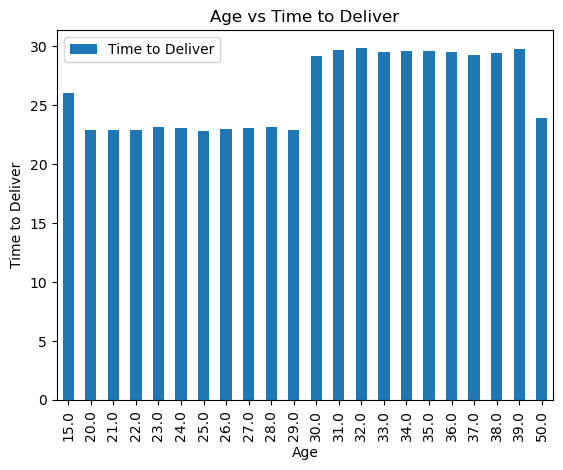

In [21]:
mean_time_age = train_data.groupby('Delivery_person_Age', as_index=False)['Time_taken(min)'].mean()
mean_time_plot = mean_time_age.plot(x='Delivery_person_Age', y='Time_taken(min)', kind='bar', label='Time to Deliver')
mean_time_plot.set_xlabel('Age')
mean_time_plot.set_ylabel('Time to Deliver')
mean_time_plot.set_title('Age vs Time to Deliver');

We see here that delivery drivers of age 20 to 29 all take roughly the same time to deliver food, drivers of age 30 to 39 all take roughly the same time to deliver food and ages 15 and 50 have more unique values. Although the mean time to deliver for a 50 year old is only slightly above that of the highest mean amongst 20-29 year olds, we will leave 50 year olds in their own category since if we are thinking rationally, there shouldn't be any correlation between the speed of a 20-29 year old and a 50 year old.

Note: the reason we want to group those age groups together is to prevent the model from overfitting the training data.

In [22]:
# first change values so that age 20 to 29 have same value (maybe string '20s') and same with 30 to 39 ('30s')

# group ages 20 to 29, and ages 30 to 39, we'll use one hot encoding
# i will not be using ordinal encoding here out of the fear that the model may place significance on the order
# it is unlikely that order should have significance here, since there's no clear reason why a 50 year old takes less time than a 30-39 year old etc

ohe = OneHotEncoder()

age_dict = {15: '15', 50: '50'}
keys_20 = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
keys_30 = [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]

for key in keys_20:
    age_dict[key] = '20-29'

for key in keys_30:
    age_dict[key] = '30-39'

train_data['Delivery_person_Age'] = train_data['Delivery_person_Age'].map(age_dict).fillna(train_data['Delivery_person_Age'])


In [23]:
train_data['Delivery_person_Age'].unique()

array(['30-39', '20-29', nan, '15', '50'], dtype=object)

In [24]:
age_arr = ohe.fit_transform(train_data[['Delivery_person_Age']]).toarray()
age_labels = ohe.categories_[0]
age = pd.DataFrame(age_arr, columns=age_labels)
age = age.loc[:, age.columns.notna()]
age.head(2)

,15,20-29,30-39,50
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0


In [25]:
train_data = pd.concat([train_data, age], axis=1)
train_data.drop('Delivery_person_Age', inplace=True, axis=1)
train_data.head(2)

,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Road_traffic_density,Type_of_order,Type_of_vehicle,multiple_deliveries,...,Cloudy,Fog,Sandstorms,Stormy,Sunny,Windy,15,20-29,30-39,50
0,4.9,22.745049,75.892471,22.765049,75.912471,11:30:00,2.0,Snack,motorcycle,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,4.5,12.913041,77.683237,13.043041,77.813237,19:45:00,3.0,Snack,scooter,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Time Ordered

In [26]:
# minutes don't have much significance to time ordered but the hour might so slice to only the hour
train_data['Time_Orderd'] = train_data['Time_Orderd'].str[:2]
train_data['Time_Orderd'].unique()

array(['11', '19', '08', '18', '13', '21', '17', '20', '14', '09', '22',
       '12', '23', nan, '10', '16', '15', '00'], dtype=object)

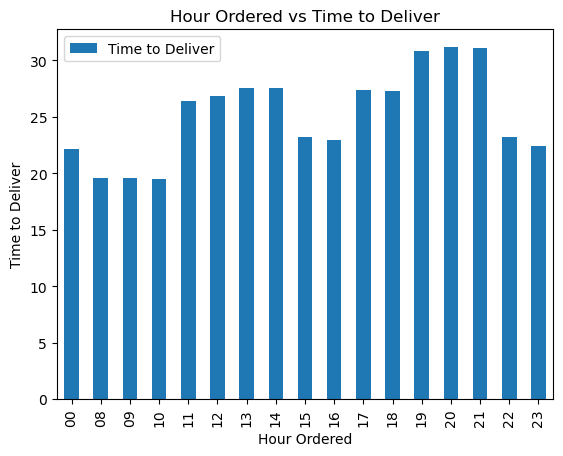

In [27]:
# plot it
mean_time_hour = train_data.groupby('Time_Orderd', as_index=False)['Time_taken(min)'].mean()
mean_time_plot = mean_time_hour.plot(x='Time_Orderd', y='Time_taken(min)', kind='bar', label='Time to Deliver')
mean_time_plot.set_xlabel('Hour Ordered')
mean_time_plot.set_ylabel('Time to Deliver')
mean_time_plot.set_title('Hour Ordered vs Time to Deliver');

We see that it takes longer around lunch time and dinner time to deliver food so we can group between meal times vs non meal times.

In [28]:
filtered_train = train_data[train_data['Time_Orderd'].isna()]
print('Mean time taken in minutes for missing time ordered values:', '%.2f' % filtered_train['Time_taken(min)'].mean())

Mean time taken in minutes for missing time ordered values: 26.31


In [29]:
meal_dict = {}
meal_times = ['11', '12', '13', '14', '17', '18', '19', '20', '21']
non_meal_times = ['00', '08', '09', '10', '15', '16', '22', '23']

for key in meal_times:
    meal_dict[key] = 'Meal_Time'

for key in non_meal_times:
    meal_dict[key] = 'Not_Meal_Time'

train_data['Time_Orderd'] = train_data['Time_Orderd'].map(meal_dict).fillna(train_data['Time_Orderd'])
train_data['Time_Orderd'].unique()

array(['Meal_Time', 'Not_Meal_Time', nan], dtype=object)

In [30]:
ohe = OneHotEncoder()
meal_arr = ohe.fit_transform(train_data[['Time_Orderd']]).toarray()
meal_labels = ohe.categories_[0]
meal = pd.DataFrame(meal_arr, columns=meal_labels)
meal = meal.loc[:, meal.columns.notna()]
meal.head(2)

,Meal_Time,Not_Meal_Time
0,1.0,0.0
1,1.0,0.0


In [31]:
train_data = pd.concat([train_data, meal], axis=1)
train_data.drop('Time_Orderd', inplace=True, axis=1)
train_data.head(3)

,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Road_traffic_density,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,...,Sandstorms,Stormy,Sunny,Windy,15,20-29,30-39,50,Meal_Time,Not_Meal_Time
0,4.9,22.745049,75.892471,22.765049,75.912471,2.0,Snack,motorcycle,0.0,No,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,4.5,12.913041,77.683237,13.043041,77.813237,3.0,Snack,scooter,1.0,No,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,4.4,12.914264,77.678400,12.924264,77.688400,0.0,Drinks,motorcycle,1.0,No,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


#### Distance from Restaurant to Customer Location

In [33]:
def deg_to_rads(deg):
    return deg * np.pi / 180

def my_haversine(row):
    r_lat1 = deg_to_rads(row['Restaurant_latitude'])
    r_lat2 = deg_to_rads(row['Delivery_location_latitude'])
    r_lon1 = deg_to_rads(row['Restaurant_longitude'])
    r_lon2 = deg_to_rads(row['Delivery_location_longitude'])
    dist_lat = r_lat2 - r_lat1
    dist_lon = r_lon2 - r_lon1
    calc_1 = np.sin(dist_lat / 2) ** 2 + np.cos(r_lat1) * np.cos(r_lat2) * (np.sin(dist_lon / 2) ** 2)
    calc_2 = 2 * np.arctan2(np.sqrt(calc_1), np.sqrt(1 - calc_1))
    earth_rad = 6371
    return earth_rad * calc_2

In [34]:
train_data['Distance'] = train_data.apply(my_haversine, axis=1)
train_data.drop(['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude'], axis=1, inplace=True)

In [35]:
train_data.head(2)

,Delivery_person_Ratings,Road_traffic_density,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Cloudy,Fog,...,Stormy,Sunny,Windy,15,20-29,30-39,50,Meal_Time,Not_Meal_Time,Distance
0,4.9,2.0,Snack,motorcycle,0.0,No,Urban,24,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.025149
1,4.5,3.0,Snack,scooter,1.0,No,Metropolitian,33,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,20.183530


#### Type of Order

In [36]:
train_data['Type_of_order'].unique()

array(['Snack ', 'Drinks ', 'Buffet ', 'Meal '], dtype=object)

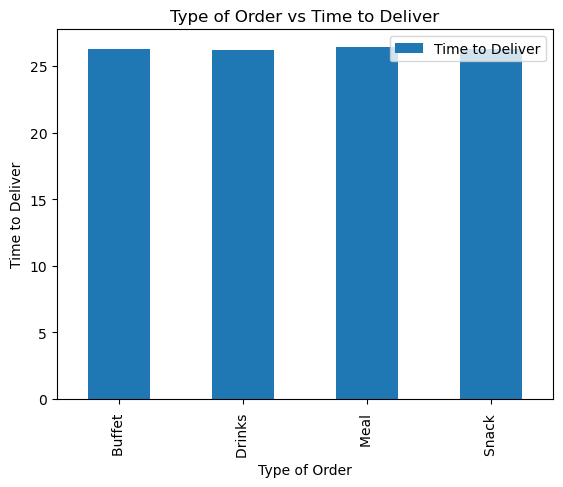

In [37]:
mean_time_type = train_data.groupby('Type_of_order', as_index=False)['Time_taken(min)'].mean()
mean_time_plot = mean_time_type.plot(x='Type_of_order', y='Time_taken(min)', kind='bar', label='Time to Deliver')
mean_time_plot.set_xlabel('Type of Order')
mean_time_plot.set_ylabel('Time to Deliver')
mean_time_plot.set_title('Type of Order vs Time to Deliver');

The type of order doesn't seem to affect the time to deliver at all! So we will just drop the column.

In [38]:
train_data.drop('Type_of_order', axis=1, inplace=True)

#### Type of Vehicle

In [39]:
train_data['Type_of_vehicle'].unique()

array(['motorcycle ', 'scooter ', 'electric_scooter ', 'bicycle '],
      dtype=object)

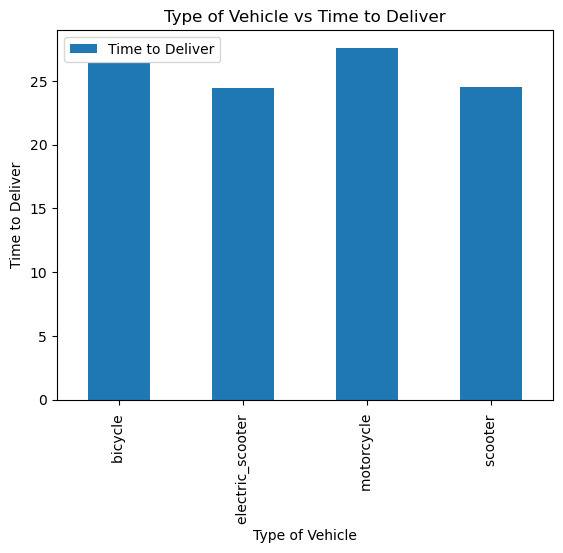

In [40]:
mean_time_vehicle = train_data.groupby('Type_of_vehicle', as_index=False)['Time_taken(min)'].mean()
mean_time_plot = mean_time_vehicle.plot(x='Type_of_vehicle', y='Time_taken(min)', kind='bar', label='Time to Deliver')
mean_time_plot.set_xlabel('Type of Vehicle')
mean_time_plot.set_ylabel('Time to Deliver')
mean_time_plot.set_title('Type of Vehicle vs Time to Deliver');

In [41]:
mean_time_vehicle

,Type_of_vehicle,Time_taken(min)
0,bicycle,26.426471
1,electric_scooter,24.470110
2,motorcycle,27.605674
3,scooter,24.480754


It seems to be the case that scooters take less time than bikes and motorcycles! Likely because the scooter ubers probably deliver to shorter distances :)

Let's group scooters, and then leave bikes and motorcycles alone.

In [42]:
vehicle_dict = {'motorcycle ': 'motorcycle', 'electric_scooter ': 'scooter', 'bicycle ': 'bicycle', 'scooter ': 'scooter'}

train_data['Type_of_vehicle'] = train_data['Type_of_vehicle'].map(vehicle_dict).fillna(train_data['Type_of_vehicle'])
train_data['Type_of_vehicle'].unique()

array(['motorcycle', 'scooter', 'bicycle'], dtype=object)

In [43]:
# one hot encode the vehicles
ohe = OneHotEncoder()
vehicle_arr = ohe.fit_transform(train_data[['Type_of_vehicle']]).toarray()
vehicle_labels = ohe.categories_[0]
vehicle = pd.DataFrame(vehicle_arr, columns=vehicle_labels)
vehicle.head(2)

,bicycle,motorcycle,scooter
0,0.0,1.0,0.0
1,0.0,0.0,1.0


In [44]:
train_data = pd.concat([train_data, vehicle], axis=1)
train_data.drop('Type_of_vehicle', axis=1, inplace=True)
train_data.head(2)

,Delivery_person_Ratings,Road_traffic_density,multiple_deliveries,Festival,City,Time_taken(min),Cloudy,Fog,Sandstorms,Stormy,...,15,20-29,30-39,50,Meal_Time,Not_Meal_Time,Distance,bicycle,motorcycle,scooter
0,4.9,2.0,0.0,No,Urban,24,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,3.025149,0.0,1.0,0.0
1,4.5,3.0,1.0,No,Metropolitian,33,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,20.183530,0.0,0.0,1.0


#### Festival

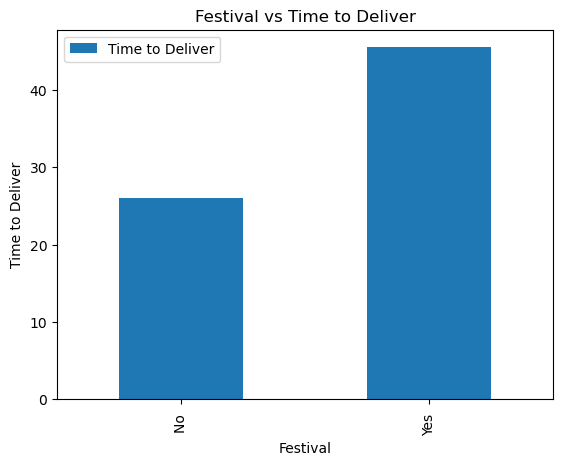

In [45]:
time_fest = train_data.groupby('Festival', as_index=False)['Time_taken(min)'].mean()
time_plot = time_fest.plot(x='Festival', y='Time_taken(min)', kind='bar', label='Time to Deliver')
time_plot.set_xlabel('Festival')
time_plot.set_ylabel('Time to Deliver')
time_plot.set_title('Festival vs Time to Deliver');

There is clearly an increase in the time to deliver when a festival is taking place. This also makes sense because **not sure if it's festival going on slowing down car or if it's festival order so more food so take longer but either way it works.**

In [46]:
train_data.Festival.value_counts()

Festival
No      44469
Yes       896
Name: count, dtype: int64

In [47]:
oe = OrdinalEncoder(categories=[['No ', 'Yes ']])
train_data.loc[train_data['Festival'].notna(), ['Festival']] = oe.fit_transform(train_data['Festival'].dropna().values.reshape(-1,1))

In [48]:
train_data.Festival.value_counts()

Festival
0.0    44469
1.0      896
Name: count, dtype: int64

In [49]:
train_data.head(2)

,Delivery_person_Ratings,Road_traffic_density,multiple_deliveries,Festival,City,Time_taken(min),Cloudy,Fog,Sandstorms,Stormy,...,15,20-29,30-39,50,Meal_Time,Not_Meal_Time,Distance,bicycle,motorcycle,scooter
0,4.9,2.0,0.0,0.0,Urban,24,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,3.025149,0.0,1.0,0.0
1,4.5,3.0,1.0,0.0,Metropolitian,33,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,20.183530,0.0,0.0,1.0


#### City

In [50]:
train_data.City.value_counts()

City
Metropolitian     34093
Urban             10136
Semi-Urban          164
Name: count, dtype: int64

In [51]:
train_data.City.unique()

array(['Urban ', 'Metropolitian ', 'Semi-Urban ', nan], dtype=object)

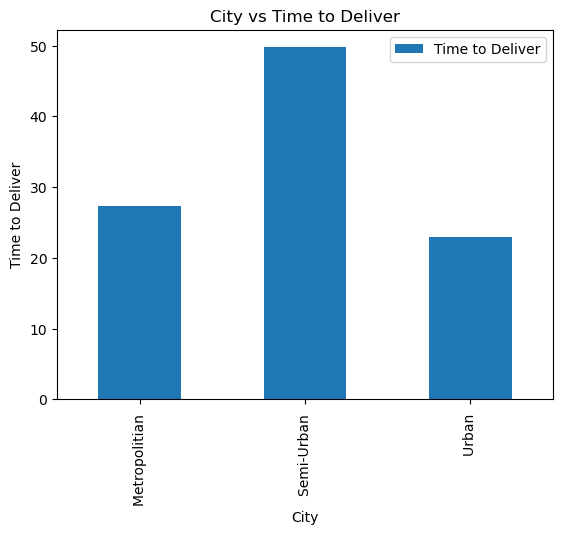

In [52]:
time_city = train_data.groupby('City', as_index=False)['Time_taken(min)'].mean()
time_plot = time_city.plot(x='City', y='Time_taken(min)', kind='bar', label='Time to Deliver')
time_plot.set_xlabel('City')
time_plot.set_ylabel('Time to Deliver')
time_plot.set_title('City vs Time to Deliver');

In [53]:
time_city

,City,Time_taken(min)
0,Metropolitian,27.315226
1,Semi-Urban,49.731707
2,Urban,22.984017


This makes sense since urban areas are the most dense, then metropolitian, then semi-urban, so let's so an ordinal encoder :)

In [54]:
oe = OrdinalEncoder(categories=[['Urban ', 'Metropolitian ', 'Semi-Urban ']])
train_data.loc[train_data['City'].notna(), ['City']] = oe.fit_transform(train_data['City'].dropna().values.reshape(-1,1))


In [55]:
train_data.head(2)

,Delivery_person_Ratings,Road_traffic_density,multiple_deliveries,Festival,City,Time_taken(min),Cloudy,Fog,Sandstorms,Stormy,...,15,20-29,30-39,50,Meal_Time,Not_Meal_Time,Distance,bicycle,motorcycle,scooter
0,4.9,2.0,0.0,0.0,0.0,24,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,3.025149,0.0,1.0,0.0
1,4.5,3.0,1.0,0.0,1.0,33,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,20.183530,0.0,0.0,1.0


#### Delivery Drivers Rating

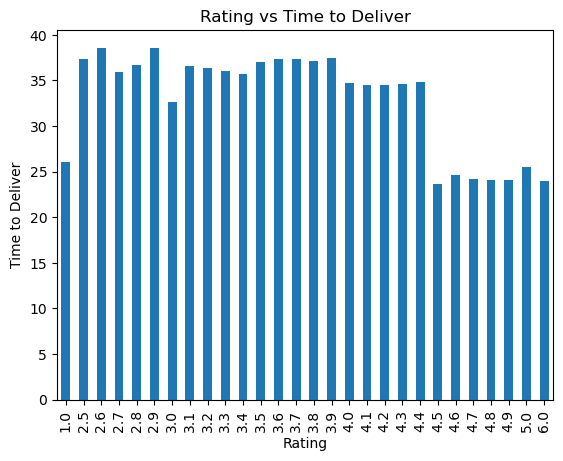

In [56]:
time_rating = train_data.groupby('Delivery_person_Ratings')['Time_taken(min)'].mean()
time_plot = time_rating.plot(x='Delivery_person_Ratings', y='Time_taken(min)', kind='bar', label='Time to Deliver')
time_plot.set_xlabel('Rating')
time_plot.set_ylabel('Time to Deliver')
time_plot.set_title('Rating vs Time to Deliver');

In [57]:
(train_data['Delivery_person_Ratings'] == 1).sum()

38

Rating of 2.5 to 4.4 seem to have similar delivery times, ratings 4.5 to 6.0 seem to have similar delivery times, so i will group these together, makes sense cause higher ratings normally means faster shipping times. A rating of 1 seems to be closer to the higher ratings, but if we look at the value counts, i don't believe there to be a big enough sample size for 1 star rating drivers, and it doesn't make sense that a 1 star driver would take the same amount of time as higher rating so i will put 1 star drivers in their own category, resulting in 3 total categories.

In [58]:
ratings_dict = {1.0: '1.0'}
low_ratings = [2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4]
high_ratings = [4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 6.0]

for rating in low_ratings:
    ratings_dict[rating] = '2.5-4.4'

for rating in high_ratings:
    ratings_dict[rating] = '4.5-6.0'

train_data['Delivery_person_Ratings'] = train_data['Delivery_person_Ratings'].map(ratings_dict).fillna(train_data['Delivery_person_Ratings'])


In [59]:
train_data['Delivery_person_Ratings'].value_counts()

Delivery_person_Ratings
4.5-6.0    35623
2.5-4.4     8024
1.0           38
Name: count, dtype: int64

In [60]:
# one hot encode the ratings
# Note: we are not using ordinal encoder here cause

ohe = OneHotEncoder()
ratings_arr = ohe.fit_transform(train_data[['Delivery_person_Ratings']]).toarray()
ratings_labels = ohe.categories_[0]
ratings = pd.DataFrame(ratings_arr, columns=ratings_labels)
ratings = ratings.loc[:, ratings.columns.notna()]

In [61]:
train_data = pd.concat([train_data, ratings], axis=1)
train_data.drop('Delivery_person_Ratings', axis=1, inplace=True)
train_data.head(3)

,Road_traffic_density,multiple_deliveries,Festival,City,Time_taken(min),Cloudy,Fog,Sandstorms,Stormy,Sunny,...,50,Meal_Time,Not_Meal_Time,Distance,bicycle,motorcycle,scooter,1.0,2.5-4.4,4.5-6.0
0,2.0,0.0,0.0,0.0,24,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,3.025149,0.0,1.0,0.0,0.0,0.0,1.0
1,3.0,1.0,0.0,1.0,33,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,20.183530,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,26,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.552758,0.0,1.0,0.0,0.0,1.0,0.0


#### Multiple Deliveries

In [62]:
train_data['multiple_deliveries'].value_counts()

multiple_deliveries
1.0    28159
0.0    14095
2.0     1985
3.0      361
Name: count, dtype: int64

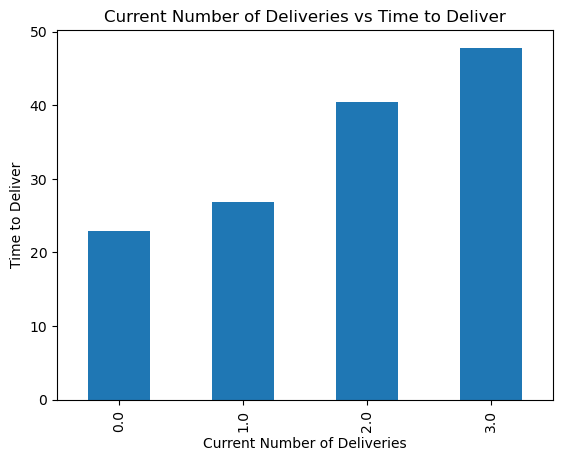

In [63]:
time_mult_deliv = train_data.groupby('multiple_deliveries')['Time_taken(min)'].mean()
time_plot = time_mult_deliv.plot(x='multiple_deliveries', y='Time_taken(min)', kind='bar', label='Time to Deliver')
time_plot.set_xlabel('Current Number of Deliveries')
time_plot.set_ylabel('Time to Deliver')
time_plot.set_title('Current Number of Deliveries vs Time to Deliver');

We see that there is clearly a steady increase in the time it takes to deliver relative to the number of deliveries, which also makes sense since if a driver has to make multiple deliveries, they will take longer for the later deliveries. We can just keep multiple_deliveries as is.

In [64]:
train_data.dtypes

Road_traffic_density    float64
multiple_deliveries     float64
Festival                 object
City                     object
Time_taken(min)           int64
Cloudy                  float64
Fog                     float64
Sandstorms              float64
Stormy                  float64
Sunny                   float64
Windy                   float64
15                      float64
20-29                   float64
30-39                   float64
50                      float64
Meal_Time               float64
Not_Meal_Time           float64
Distance                float64
bicycle                 float64
motorcycle              float64
scooter                 float64
1.0                     float64
2.5-4.4                 float64
4.5-6.0                 float64
dtype: object

We see that festival's and cities are still objects so let's convert these to floats so that our model can work with them.

In [70]:
train_data['Festival'] = train_data['Festival'].astype(float)
train_data['City'] = train_data['City'].astype(float)

In [72]:
train_data.dtypes

Road_traffic_density    float64
multiple_deliveries     float64
Festival                float64
City                    float64
Time_taken(min)           int64
Cloudy                  float64
Fog                     float64
Sandstorms              float64
Stormy                  float64
Sunny                   float64
Windy                   float64
15                      float64
20-29                   float64
30-39                   float64
50                      float64
Meal_Time               float64
Not_Meal_Time           float64
Distance                float64
bicycle                 float64
motorcycle              float64
scooter                 float64
1.0                     float64
2.5-4.4                 float64
4.5-6.0                 float64
dtype: object

Now we can finally start to build our model!

#### Split training so we have validation data
I want a 10% validation data split of the whole dataset, so we will split the current training data into a 70/10 train/validation split which means that validation data makes up 12.5% ($10/80$) of the current training data.

In [65]:
from sklearn.model_selection import train_test_split

# train_data, valid_data = train_test_split(train_data, test_size=0.125, random_state=1)